In [505]:
import numpy as np # mathemtaical computation
# numpy is aliased as np
import pandas as pd # data preprocessing
# pandas is aliased as pd
import matplotlib.pyplot as plt # visualization
# pyplot is aliased as plt
import seaborn as sns  # visualization
# seaborn is aliased as sns
import sklearn

In [506]:
# Major Import
import sklearn
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

In [507]:
df=pd.read_csv('CAR_DETAILS.csv')
df.head()

,name,Brand_name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,Maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,Maruti,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,Hyundai,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,Datsun,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,Maruti,2007,140000,125000,Petrol,Individual,Manual,First Owner


In [508]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   Brand_name     4340 non-null   object
 2   year           4340 non-null   int64 
 3   selling_price  4340 non-null   int64 
 4   km_driven      4340 non-null   int64 
 5   fuel           4340 non-null   object
 6   seller_type    4340 non-null   object
 7   transmission   4340 non-null   object
 8   owner          4340 non-null   object
dtypes: int64(3), object(6)
memory usage: 305.3+ KB


In [509]:
df.shape

(4340, 9)

In [510]:
df['Brand_name'].unique()

array(['Maruti', 'Hyundai', 'Datsun', 'Chevrolet', 'Toyota', 'Honda',
       'Tata', 'Jaguar', 'Mercedes-Benz', 'Audi', 'Skoda', 'Jeep', 'BMW',
       'Mahindra', 'Ford', 'Nissan', 'Renault', 'Fiat', 'Volkswagen',
       'Volvo', 'Mitsubishi', 'Land', 'Daewoo', 'MG', 'Force', 'Isuzu',
       'OpelCorsa', 'Ambassador', 'Kia'], dtype=object)

In [511]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [512]:
df=df[df['selling_price']<6e6].reset_index(drop=True)  

In [513]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4338 entries, 0 to 4337
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4338 non-null   object
 1   Brand_name     4338 non-null   object
 2   year           4338 non-null   int64 
 3   selling_price  4338 non-null   int64 
 4   km_driven      4338 non-null   int64 
 5   fuel           4338 non-null   object
 6   seller_type    4338 non-null   object
 7   transmission   4338 non-null   object
 8   owner          4338 non-null   object
dtypes: int64(3), object(6)
memory usage: 305.1+ KB


In [514]:
df.duplicated().sum()

746

In [515]:
df.drop_duplicates(inplace=True)

In [516]:
df.dtypes

name             object
Brand_name       object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [517]:
df.isnull().sum()

name             0
Brand_name       0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [518]:
#df.drop('',axis=1,inplace=True)
#df.columns

In [519]:
df.duplicated().sum()

0

In [520]:
df['name'].nunique()

1489

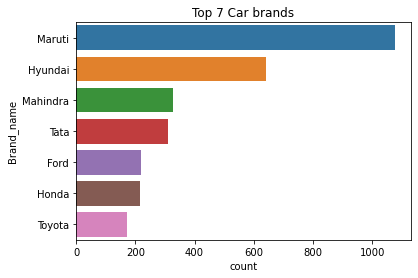

In [521]:
sns.countplot(y=df['Brand_name'],
              order=df['Brand_name'].value_counts().sort_values(ascending=False)[:7].index)
plt.title('Top 7 Car brands')
plt.show()

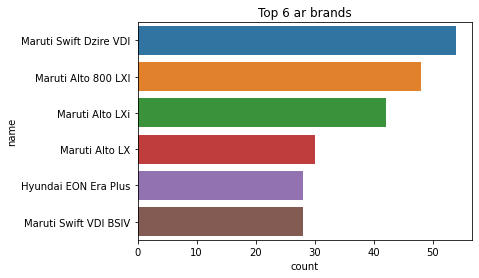

In [522]:
sns.countplot(y=df['name'],
              order=df['name'].value_counts().sort_values(ascending=False)[:6].index)
plt.title('Top 6 ar brands')
plt.show()

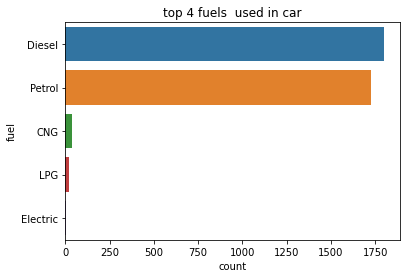

In [523]:
sns.countplot(y=df['fuel'],
              order=df['fuel'].value_counts().sort_values(ascending=False).index)
plt.title('top 4 fuels  used in car')
plt.show()

In [524]:
df.columns

Index(['name', 'Brand_name', 'year', 'selling_price', 'km_driven', 'fuel',
       'seller_type', 'transmission', 'owner'],
      dtype='object')

In [525]:
car = df.copy()

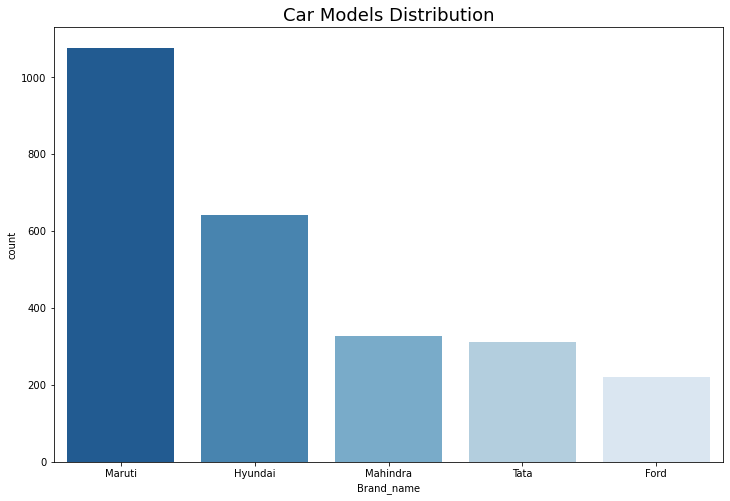

In [526]:
# Plot of Car Models Distribution
figure = plt.figure(figsize=(12,8))
plt.title('Car Models Distribution', fontsize=18)
plot = sns.countplot(x="Brand_name", data=car, order = car['Brand_name'].value_counts().index[:5], palette='Blues_r')
plt.show()

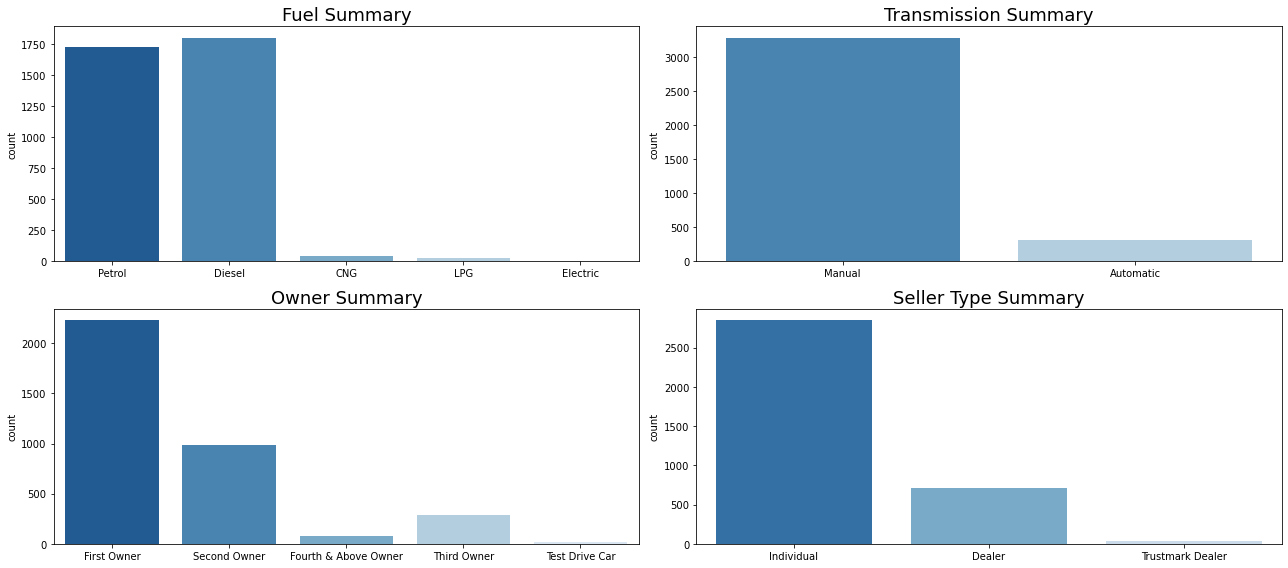

In [527]:
# Subplot of Categorical Summary
plt.figure(figsize=(18,8))

plt.subplot(2,2,1)
plt.title('Fuel Summary', fontsize=18)
sns.countplot(data=car, x='fuel', palette='Blues_r')
plt.xlabel('')
plt.subplot(2,2,2)
plt.title('Transmission Summary', fontsize=18)
sns.countplot(data=car, x='transmission', palette='Blues_r')
plt.xlabel('')
plt.subplot(2,2,3)
plt.title('Owner Summary', fontsize=18)
sns.countplot(data=car, x='owner', palette='Blues_r')
plt.xlabel('')
plt.subplot(2,2,4)
plt.title('Seller Type Summary', fontsize=18)
sns.countplot(data=car, x='seller_type', palette='Blues_r')
plt.xlabel('')

plt.tight_layout()
plt.show()

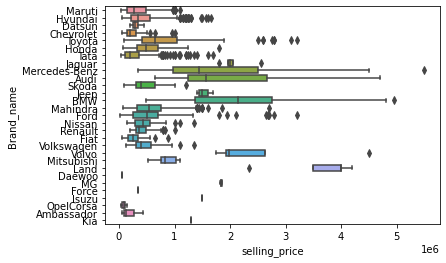

In [528]:
sns.boxplot(y=df['Brand_name'],x=df['selling_price'])
plt.show()

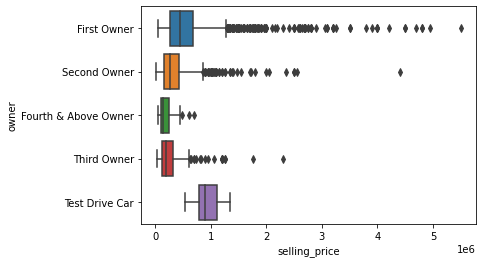

In [529]:
sns.boxplot(y=df['owner'],x=df['selling_price'])
plt.show()

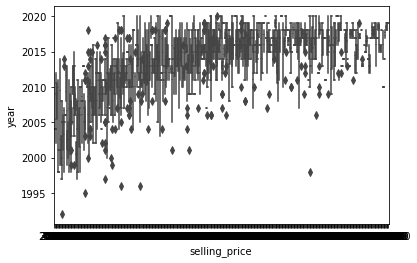

In [530]:
sns.boxplot(y=df['year'],x=df['selling_price'])
plt.show()

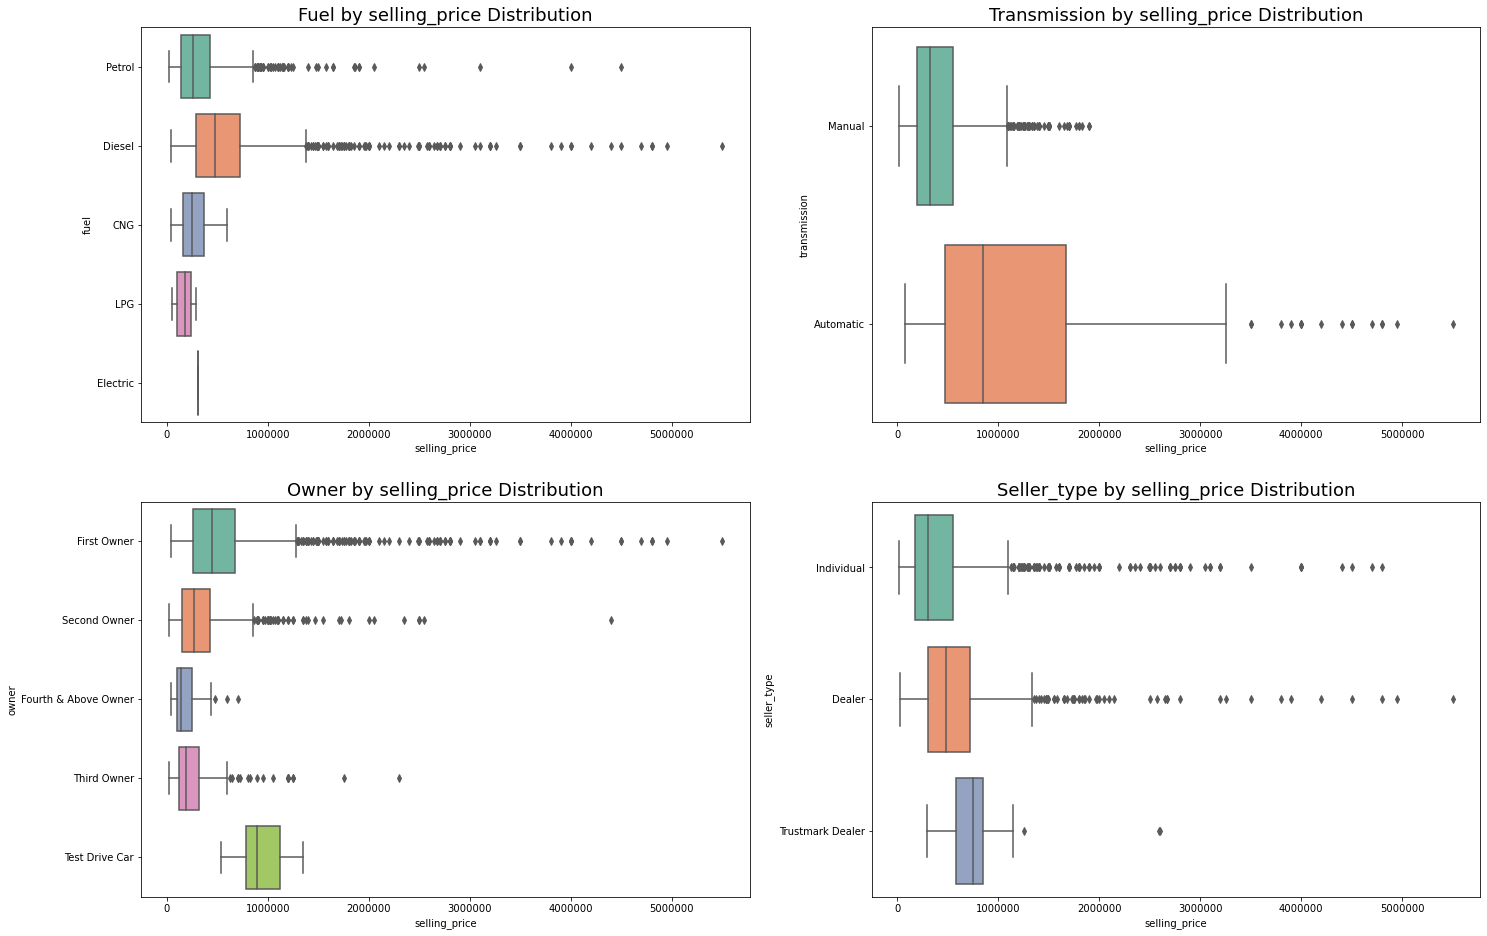

In [531]:
plt.figure(figsize=(24,16))

plt.subplot(2,2,1)
plt.title('Fuel by selling_price Distribution', fontsize=18)
sns.boxplot(data=car, x='selling_price', y='fuel', palette='Set2')
plt.ticklabel_format(style='plain', axis='x')
plt.subplot(2,2,2)
plt.title('Transmission by selling_price Distribution', fontsize=18)
sns.boxplot(data=car, x='selling_price', y='transmission', palette='Set2')
plt.ticklabel_format(style='plain', axis='x')
plt.subplot(2,2,3)
plt.title('Owner by selling_price Distribution', fontsize=18)
sns.boxplot(data=car, x='selling_price', y='owner', palette='Set2')
plt.ticklabel_format(style='plain', axis='x')
plt.subplot(2,2,4)
plt.title('Seller_type by selling_price Distribution', fontsize=18)
sns.boxplot(data=car, x='selling_price', y='seller_type', palette='Set2')
plt.ticklabel_format(style='plain', axis='x')

In [532]:
df.columns

Index(['name', 'Brand_name', 'year', 'selling_price', 'km_driven', 'fuel',
       'seller_type', 'transmission', 'owner'],
      dtype='object')

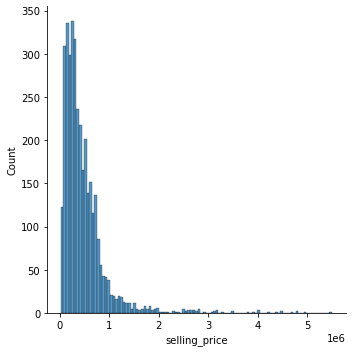

In [533]:
sns.displot(df['selling_price'])
plt.show()

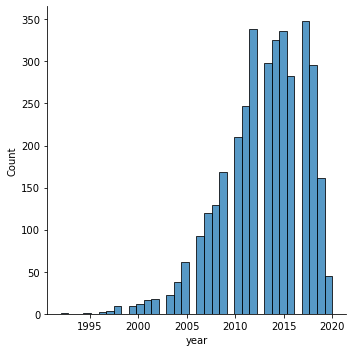

In [534]:
sns.displot(df['year'])
plt.show()

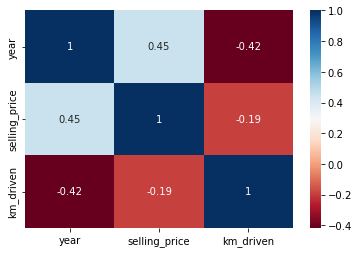

In [535]:
corr =  df.corr()
sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()

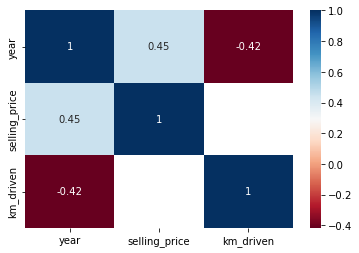

In [536]:
sns.heatmap(corr[abs(corr)>0.4],annot=True,cmap='RdBu')
plt.show()

In [537]:
df.describe(percentiles=[0.01,0.02,0.03,0.05,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,5%,50%,97%,98%,99%,max
year,3592.0,2012.964365,4.248984,1992.0,2000.00,2003.0,2004.0,2005.0,2013.0,2019.0,2019.0,2020.0,2020.0
selling_price,3592.0,469278.998608,471990.530881,20000.0,51919.99,60000.0,70000.0,80000.0,350000.0,1490000.0,1800000.0,2604500.0,5500000.0
km_driven,3592.0,69256.041759,47522.847345,1.0,1752.78,5000.0,6889.3,10000.0,60000.0,170000.0,192540.0,223059.4,806599.0


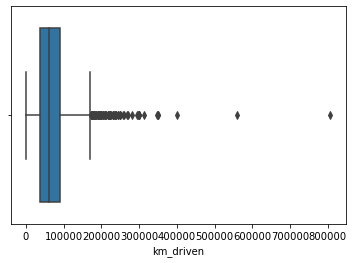

In [538]:
sns.boxplot(x=df['km_driven'])
plt.show()

In [539]:
print(df[df['km_driven']>5000].shape)

(3496, 9)


In [540]:
df.head()

,name,Brand_name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,Maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,Maruti,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,Hyundai,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,Datsun,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,Maruti,2007,140000,125000,Petrol,Individual,Manual,First Owner


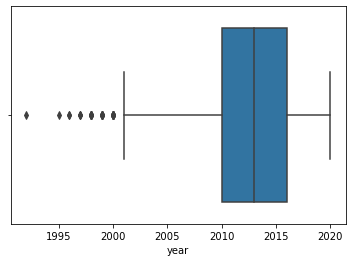

In [541]:
sns.boxplot(x=df['year'])
plt.show()

In [542]:
print(df[df['year']>1].shape)

(3592, 9)


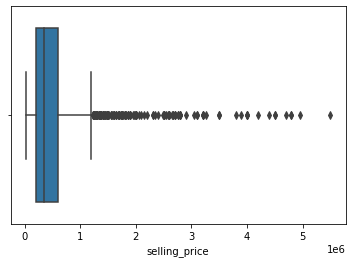

In [543]:
sns.boxplot(x=df['selling_price'])
plt.show()

In [544]:
print(df[df['selling_price']>50000].shape)

(3557, 9)


In [545]:
#df['year']= np.where(df['year']>5,10,df['year'])
# df['Weight']= np.where(df['Weight']>3.5,3.5,df['Weight'])

In [546]:
#sns.boxplot(x=df['year'])
#plt.show()

In [547]:
df['Brand_name'].nunique()

29

In [548]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3592 entries, 0 to 4337
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3592 non-null   object
 1   Brand_name     3592 non-null   object
 2   year           3592 non-null   int64 
 3   selling_price  3592 non-null   int64 
 4   km_driven      3592 non-null   int64 
 5   fuel           3592 non-null   object
 6   seller_type    3592 non-null   object
 7   transmission   3592 non-null   object
 8   owner          3592 non-null   object
dtypes: int64(3), object(6)
memory usage: 280.6+ KB


In [549]:
df.drop('name',axis=1,inplace=True)
df.columns

Index(['Brand_name', 'year', 'selling_price', 'km_driven', 'fuel',
       'seller_type', 'transmission', 'owner'],
      dtype='object')

In [550]:
X = df.drop(columns='selling_price')
y = df['selling_price']
print(type(X))
print(type(y))
print(X.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(3592, 7)
(3592,)


In [551]:
# Spliting training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size = 0.2)#, random_state=80)

In [552]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(2873, 7)
(719, 7)
(2873,)


In [553]:
## Model building and One Hot Encoding
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [554]:
def eval_model(ytest,ypred):
    mae = mean_absolute_error(ytest,ypred)
    mse = mean_squared_error(ytest,ypred)
    rmse = np.sqrt(mse)
    r2s = r2_score(ytest,ypred)
    print('MAE',mae)
    print('MSE',mse)
    print('RMSE',rmse)
    print('R2 Score',r2s)

In [555]:
ohe =OneHotEncoder()
ohe.fit(X[['Brand_name','fuel','seller_type','owner','transmission']])

OneHotEncoder()

In [556]:
x_train.dtypes

Brand_name      object
year             int64
km_driven        int64
fuel            object
seller_type     object
transmission    object
owner           object
dtype: object

In [557]:
#from sklearn.preprocessing import LabelEncoder

#lb = LabelEncoder()

In [558]:
#Con_list = [ ]
#for i in Con_list:
# df[i] = lb.fit_transform(df[i])

In [559]:
# Finding the random state at which model has highest accuracy
scores=[]
for i in range(100):
    X_train,X_test, y_train,y_test=train_test_split(X,y,test_size = 0.2, random_state=i)
    lr = LinearRegression()
    pipe = make_pipeline(column_trans, lr)
    pipe.fit(X_train, y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))
    print(r2_score(y_test,y_pred), i)

0.6894281662256713 0
0.6051754040406285 1
0.6601304667731256 2
0.6128787957772832 3
0.6701261474179281 4
0.6951062093146054 5
0.6482137065711285 6
0.6921064428382209 7
0.6527559605042883 8
0.6246080143698183 9
0.7120229390343924 10
0.6067106952517354 11
0.6778625519914678 12
0.6695434352164839 13
0.7153805325980839 14
0.6638144805949089 15
0.6518057619139219 16
0.6667583916608782 17
0.660097412927436 18
0.6458183989525632 19
0.6154574247301008 20
0.6520170079987679 21
0.6235254866285713 22
0.6221135942626739 23
0.7114798082792821 24
0.6271929049530462 25
0.6914117885606821 26
0.6245874130616432 27
0.6511528532573951 28
0.6803574237171263 29
0.6012556304920759 30
0.6971586108881535 31
0.5711398122851741 32
0.6732881750150731 33
0.5878269652747352 34
0.643281002250689 35
0.7456564508817636 36
0.6754288930878629 37
0.6223696480728518 38
0.650888359696784 39
0.587288240196761 40
0.6982148228154783 41
0.688020938715048 42
0.7006501345011633 43
0.5885697707475583 44
0.6600842270733245 45
0.6

In [560]:
np.argmax(scores)

36

In [561]:
scores[np.argmax(scores)]

0.7456564508817636

In [562]:
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size = 0.2, random_state=np.argmax(scores))
lr = LinearRegression()
pipe = make_pipeline(column_trans, lr)
pipe.fit(X_train, y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.7456564508817636

In [563]:
ohe = OneHotEncoder()
ohe.fit(x[['fuel','transmission','owner','Brand_name','seller_type']])
ohe.categories_
column_trans = make_column_transformer((OneHotEncoder(categories = ohe.categories_),['fuel','transmission','owner','Brand_name','seller_type']),
                                       remainder = 'passthrough')
lr = LinearRegression()
pipe = make_pipeline(column_trans, lr)
pipe.fit(X_train, y_train)
y_pred =pipe.predict(X_test)
r2_score(y_test,y_pred)

0.7456564508817636

In [564]:
df.head()

,Brand_name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Maruti,2007,140000,125000,Petrol,Individual,Manual,First Owner


In [565]:
## Save The Model
#import pickle
#pickle.dump(pipe,open('lr.pkl','wb'))
#pickle.dump(df,open('df.pkl','wb'))
#pipe.predict(pd.DataFrame([[2007,50000,'Petrol','Manual','First Owner','Maruti Wagon']],columns=['year','km_driven','fuel','transmission','owner','seller_type']))
#df5.columns
#pipe.predict(pd.DataFrame([[1992,50000,'Petrol','Manual','First Owner','Maruti','800']],columns=['year','km_driven','fuel','transmission','owner','brand','names']))

In [566]:
import pickle

In [567]:
# Save object to a pickle file
with open("pipeline_fit01.pkl", "wb") as file:
    pickle.dump(pipe.fit, file)

# Load object from pickle file
with open("pipeline_fit01.pkl", "rb") as file:
    loaded_object = pickle.load(file)


In [568]:
print(type(loaded_object))

<class 'method'>


In [569]:
pickle.dump(df,open('car_details_data.pkl','wb'))

In [570]:
pickle.dump(df,open('pipe.pkl','wb'))

In [571]:
# Save the pipeline object to a file
with open('pipeline.fit.pkl', 'wb') as f:
    pickle.dump(pipe.fit, f)

In [572]:
loaded_model = pickle.load(open('pipeline.fit.pkl','rb'))

In [573]:
# Load the saved pipeline object from the file
with open('pipeline.fit.pkl', 'rb') as f:
    loaded_pipeline = pickle.load(f)

In [574]:
new_df = x.sample(10)
new_df

,Brand_name,year,km_driven,fuel,seller_type,transmission,owner
2596,Honda,2013,90000,Diesel,Individual,Manual,Second Owner
718,Volkswagen,2013,44049,Diesel,Dealer,Manual,First Owner
1410,Audi,2015,35000,Diesel,Individual,Automatic,Third Owner
1827,Volkswagen,2011,90000,Diesel,Individual,Manual,Third Owner
4195,Maruti,2007,80000,Petrol,Individual,Manual,Third Owner
1233,Hyundai,2013,66000,Petrol,Individual,Manual,First Owner
3820,Chevrolet,2012,42000,Diesel,Dealer,Automatic,First Owner
2120,Hyundai,2011,58000,Petrol,Dealer,Manual,Second Owner
1509,Maruti,2015,170000,Diesel,Individual,Manual,Second Owner
1628,Volkswagen,2012,97000,Diesel,Individual,Manual,First Owner


In [575]:
print(type(loaded_pipeline))

<class 'method'>


In [576]:
#predict_price = loaded_pipeline.predict(new_df)

In [577]:
#new_df['predict_price']= predict_price
#new_df.head(20)